### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
df_forest_fire = pd.read_csv('forestfires.csv')
df_forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


__EDA__

In [3]:
df_forest_fire.shape

(517, 31)

In [4]:
df_forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df_forest_fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_forest_fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
# droping the columns

df_forest_fire = df_forest_fire.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 
                                      'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar',
                                      'monthmay', 'monthnov','monthoct','monthsep'], axis = 1)
df_forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
df_forest_fire.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

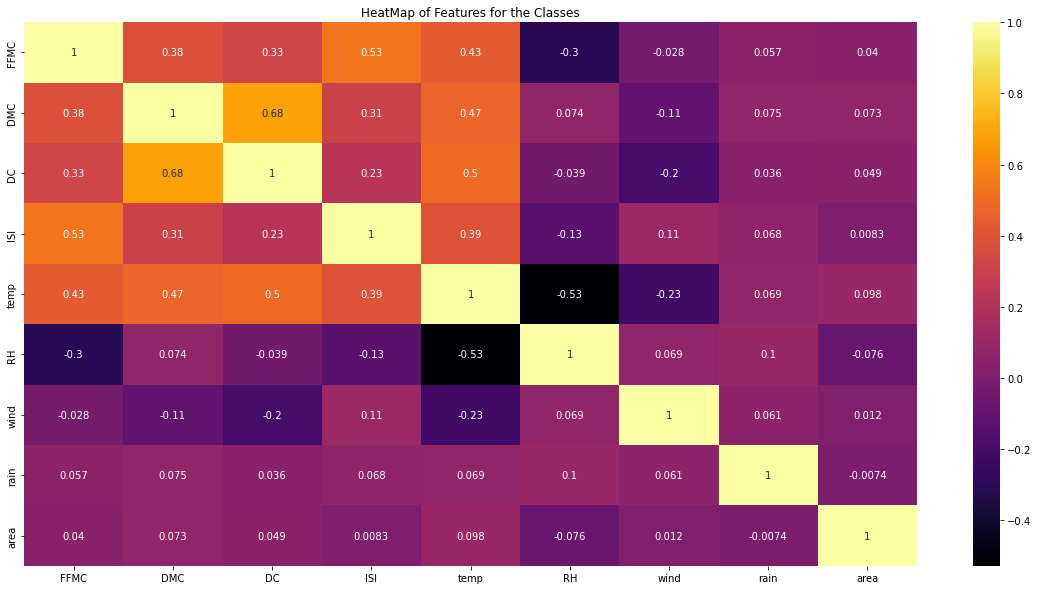

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.heatmap(df_forest_fire.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [10]:
# Encode 'month' and 'day' columns

df_forest_fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                                                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df_forest_fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df_forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [11]:
# Encoding the target variable 'size category'

df_forest_fire.size_category.replace(('small', 'large'), (0, 1), inplace = True)
df_forest_fire.sample(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
500,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0
390,2,1,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,9.96,1
101,8,2,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,0.00,0
401,9,4,91.1,88.2,731.7,8.3,22.8,46,4.0,0.0,4.95,0
292,7,5,91.6,100.2,466.3,6.3,22.9,40,1.3,0.0,2.64,0
489,8,3,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0,0.00,0
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
485,8,1,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07,0
350,9,5,92.1,99.0,745.3,9.6,10.1,75,3.6,0.0,3.71,0
490,8,3,95.1,141.3,605.8,17.7,28.7,33,4.0,0.0,0.00,0


In [12]:
# Standardize the data

scaler = StandardScaler()
scaler.fit(df_forest_fire.drop('size_category', axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(df_forest_fire.drop('size_category', axis=1))
df_head = pd.DataFrame(scaled_features, columns=df_forest_fire.columns[:-1])
df_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [14]:
# Split the data into test and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_head, df_forest_fire['size_category'], test_size=0.3, random_state=42)

In [15]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


### ANN Model - Backpropagation

In [16]:
# Import packages

from keras.models import Sequential
from keras.layers import Dense

In [17]:
# create model

model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit the model
history  = model.fit(x_train, y_train, epochs=100, batch_size=10)
# Fit the model
#model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/100
37/37 [==============================] - 2s 3ms/step - loss: 0.6886 - accuracy: 0.7147
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.7285
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.7285
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7285
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7285
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7313
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7396
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7562
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7701
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7812
Epoch 11/

37/37 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9889
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 85/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9889
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9972
Epoch 87/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9945
Epoch 88/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9945
Epoch 89/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 90/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9889
Epoch 91/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9889
Epoch 92/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9917
Epoch 93/100


In [20]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9808
accuracy: 98.08%


In [21]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy'])

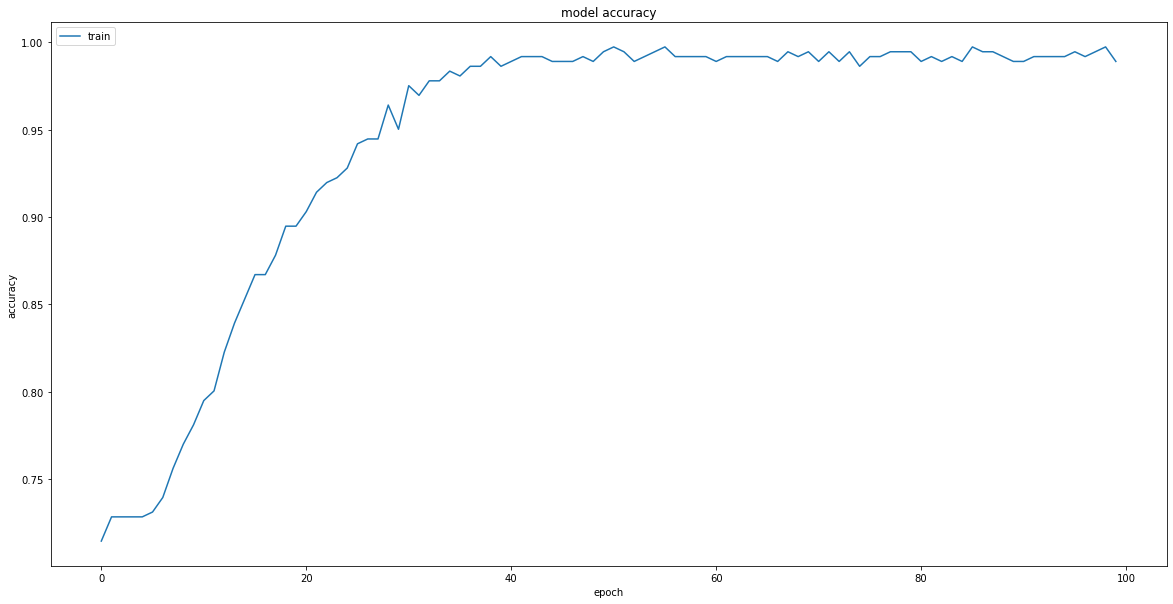

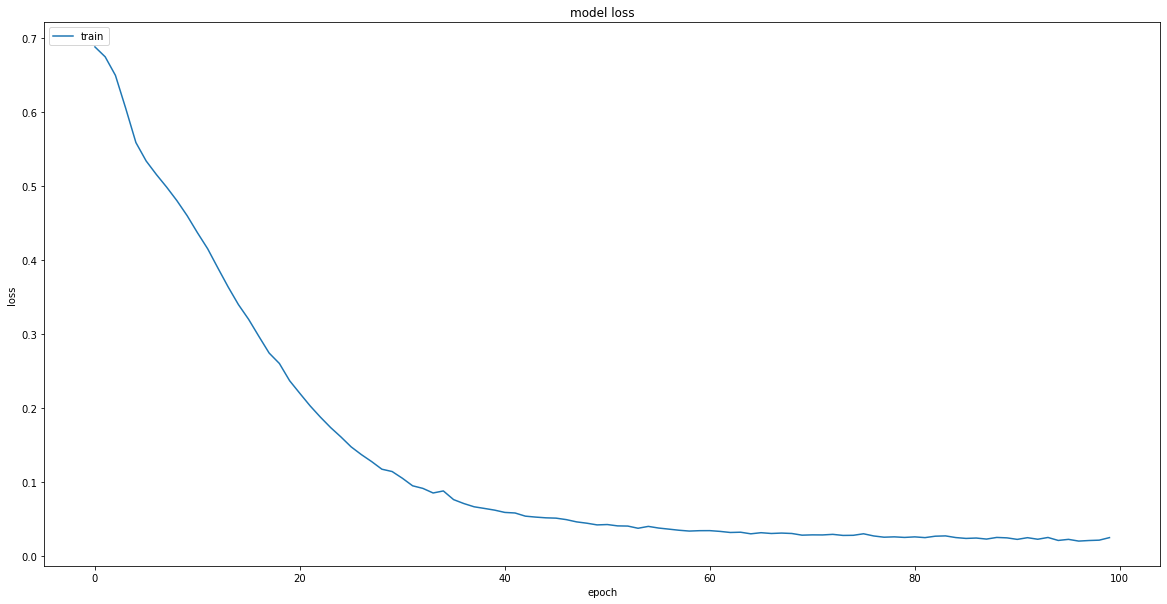

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
